
# Global Electronics Retailer — Exploratory Data Analysis (EDA)

**Goal.** Perform business-focused exploratory analysis on the Maven Analytics "Global Electronics Retailer" dataset and prepare a clean analysis table for a Tableau dashboard.

**Data files**
- `Datasets/Customers.csv` (15k+ customers)
- `Datasets/Products.csv` (2.5k+ products, incl. Unit Price/Cost)
- `Datasets/Sales.csv` (62k+ order lines)
- `Datasets/Stores.csv` (store metadata incl. country)
- `Datasets/Exchange_Rates.csv` *(optional)*
- `Datasets/Data_Dictionary.csv` *(field descriptions)*



# 1. Imports, Drive mount & project paths

In [14]:
## Imports & Paths — mount Drive, define stable project folders, validate file presence.

# ---- imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_columns', None)

# ---- mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ---- project directories (update only BASE_DIR if you move the project)
BASE_DIR   = Path('/content/drive/MyDrive/Colab Notebooks/Global Electronics Retailer')
DATA_DIR   = BASE_DIR / 'Datasets'
OUTPUT_DIR = BASE_DIR / 'Tableau_Export'

print("📁 Base:", BASE_DIR)
print("📂 Data:", DATA_DIR)
print("📤 Output:", OUTPUT_DIR)

# ---- quick existence check
required = ['Customers.csv','Products.csv','Sales.csv','Stores.csv','Exchange_Rates.csv','Data_Dictionary.csv']
for name in required:
    p = DATA_DIR / name
    print(("✅" if p.exists() else "❌"), name, "->", p)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📁 Base: /content/drive/MyDrive/Colab Notebooks/Global Electronics Retailer
📂 Data: /content/drive/MyDrive/Colab Notebooks/Global Electronics Retailer/Datasets
📤 Output: /content/drive/MyDrive/Colab Notebooks/Global Electronics Retailer/Tableau_Export
✅ Customers.csv -> /content/drive/MyDrive/Colab Notebooks/Global Electronics Retailer/Datasets/Customers.csv
✅ Products.csv -> /content/drive/MyDrive/Colab Notebooks/Global Electronics Retailer/Datasets/Products.csv
✅ Sales.csv -> /content/drive/MyDrive/Colab Notebooks/Global Electronics Retailer/Datasets/Sales.csv
✅ Stores.csv -> /content/drive/MyDrive/Colab Notebooks/Global Electronics Retailer/Datasets/Stores.csv
✅ Exchange_Rates.csv -> /content/drive/MyDrive/Colab Notebooks/Global Electronics Retailer/Datasets/Exchange_Rates.csv
✅ Data_Dictionary.csv -> /content/drive/MyDrive/Colab Notebooks/Global Electronic

# 2. Robust CSV loader & data read

In [15]:
## Robust Loader — read CSVs using multiple encodings; handle semicolon-separated fallbacks.

def read_csv_safely(path: Path):
    """Try multiple encodings; fall back to semicolon delimiter for regional CSVs."""
    for enc in ['utf-8', 'utf-8-sig', 'cp1252', 'latin1']:
        try:
            return pd.read_csv(path, encoding=enc)
        except Exception:
            continue
    return pd.read_csv(path, encoding='latin1', sep=';')

customers  = read_csv_safely(DATA_DIR/'Customers.csv')
products   = read_csv_safely(DATA_DIR/'Products.csv')
sales      = read_csv_safely(DATA_DIR/'Sales.csv')
stores     = read_csv_safely(DATA_DIR/'Stores.csv')
ex_rates   = read_csv_safely(DATA_DIR/'Exchange_Rates.csv')
data_dict  = read_csv_safely(DATA_DIR/'Data_Dictionary.csv')

customers.head(), products.head(), sales.head(), stores.head()

(   CustomerKey  Gender               Name            City State Code  \
 0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
 1          325  Female       Madison Hull      MOUNT BUDD         WA   
 2          554  Female      Claire Ferres       WINJALLOK        VIC   
 3          786    Male  Jai Poltpalingada    MIDDLE RIVER         SA   
 4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH        VIC   
 
                State Zip Code    Country  Continent    Birthday  
 0    South Australia     5523  Australia  Australia    7/3/1939  
 1  Western Australia     6522  Australia  Australia   9/27/1979  
 2           Victoria     3380  Australia  Australia   5/26/1947  
 3    South Australia     5223  Australia  Australia   9/17/1957  
 4           Victoria     3698  Australia  Australia  11/19/1965  ,
    ProductKey                         Product Name    Brand   Color  \
 0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   
 1           

# 3. Data overview (quick scan)

In [16]:
## Overview — quick descriptive stats to spot obvious data issues early.

def basic_overview(df, name):
    print(f"\n=== {name} ===")
    print("shape:", df.shape)
    display(df.head(3))
    display(df.describe(include='all').transpose().iloc[:,:6])

for nm, df in [('Customers', customers), ('Products', products), ('Sales', sales), ('Stores', stores)]:
    basic_overview(df, nm)



=== Customers ===
shape: (15266, 10)


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947


,count,unique,top,freq,mean,std
CustomerKey,15266.0,NaN,NaN,NaN,1060508.139198,612709.689556
Gender,15266,2,Male,7748,NaN,NaN
Name,15266,15118,John Smith,4,NaN,NaN
City,15266,8258,Toronto,204,NaN,NaN
State Code,15256,467,CA,740,NaN,NaN
State,15266,512,California,715,NaN,NaN
Zip Code,15266,9505,90017,70,NaN,NaN
Country,15266,8,United States,6828,NaN,NaN
Continent,15266,3,North America,8381,NaN,NaN
Birthday,15266,11270,5/29/1965,5,NaN,NaN



=== Products ===
shape: (2517, 10)


,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio


,count,unique,top,freq,mean,std
ProductKey,2517.0,NaN,NaN,NaN,1259.0,726.739637
Product Name,2517,2517,Contoso In-Line Coupler E180 Silver,1,NaN,NaN
Brand,2517,11,Contoso,710,NaN,NaN
Color,2517,16,Black,602,NaN,NaN
Unit Cost USD,2517,480,$15.29,34,NaN,NaN
Unit Price USD,2517,426,$29.99,30,NaN,NaN
SubcategoryKey,2517.0,NaN,NaN,NaN,491.810091,229.887134
Subcategory,2517,32,Computers Accessories,201,NaN,NaN
CategoryKey,2517.0,NaN,NaN,NaN,4.878824,2.29917
Category,2517,8,Home Appliances,661,NaN,NaN



=== Sales ===
shape: (62884, 9)


,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD


,count,unique,top,freq,mean,std
Order Number,62884.0,NaN,NaN,NaN,1430904.911424,453296.304711
Line Item,62884.0,NaN,NaN,NaN,2.164207,1.36517
Order Date,62884,1641,12/21/2019,222,NaN,NaN
Delivery Date,13165,1492,1/6/2020,50,NaN,NaN
CustomerKey,62884.0,NaN,NaN,NaN,1180797.461628,585963.395414
StoreKey,62884.0,NaN,NaN,NaN,31.802144,22.978188
ProductKey,62884.0,NaN,NaN,NaN,1125.859344,709.24401
Quantity,62884.0,NaN,NaN,NaN,3.14479,2.256371
Currency Code,62884,5,USD,33767,NaN,NaN



=== Stores ===
shape: (67, 5)


,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012


,count,unique,top,freq,mean,std
StoreKey,67.0,NaN,NaN,NaN,33.0,19.485037
Country,67,9,United States,24,NaN,NaN
State,67,67,Australian Capital Territory,1,NaN,NaN
Square Meters,66.0,NaN,NaN,NaN,1402.19697,576.404058
Open Date,67,25,1/1/2010,9,NaN,NaN


# 4. Cleaning & typing

In [17]:
## Cleaning & Typing — parse dates; strip text; convert numbers; drop duplicates.

# ---- date parsing
sales['Order Date']    = pd.to_datetime(sales['Order Date'],    errors='coerce')
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'], errors='coerce')
if 'Open Date' in stores.columns:
    stores['Open Date'] = pd.to_datetime(stores['Open Date'], errors='coerce')

# ---- trim strings
for df in [customers, products, stores, sales]:
    for c in df.select_dtypes(include='object').columns:
        df[c] = df[c].astype(str).str.strip()

# ---- helper: to numeric (remove $, commas, stray chars)
def to_num(series: pd.Series):
    return pd.to_numeric(series.astype(str).str.replace(r'[^0-9\.\-]', '', regex=True), errors='coerce')

# ---- numeric conversions BEFORE joins
# Sales
sales['Quantity'] = to_num(sales['Quantity'])

# Products (monetary values)
products['Unit Price USD'] = to_num(products['Unit Price USD'])
products['Unit Cost USD']  = to_num(products['Unit Cost USD'])

# Stores (optional)
if 'Square Meters' in stores.columns:
    stores['Square Meters'] = to_num(stores['Square Meters'])

# ---- drop exact duplicates
sales     = sales.drop_duplicates()
products  = products.drop_duplicates()
customers = customers.drop_duplicates()
stores    = stores.drop_duplicates()

# ---- quick dtype check
print(sales[['Quantity']].dtypes)
print(products[['Unit Price USD','Unit Cost USD']].dtypes)


Quantity    int64
dtype: object
Unit Price USD    float64
Unit Cost USD     float64
dtype: object


# 5. Build analysis table (star-schema style join)

In [18]:
## Build Analysis Table — left-join the sales fact to product/customer/store dimensions; compute revenue, cost, margin, and month.

# Keys: ProductKey, CustomerKey, StoreKey exist in Sales; join to dimensions

df = sales.merge(
        products[['ProductKey','Product Name','Brand','Color','Unit Cost USD','Unit Price USD',
                  'Subcategory','SubcategoryKey']],
        on='ProductKey', how='left'
    ).merge(
        customers[['CustomerKey','Gender','City','State','Country']],
        on='CustomerKey', how='left'
    ).merge(
        stores[['StoreKey','Country','State','Square Meters','Open Date']]
              .rename(columns={'Country':'Store Country','State':'Store State'}),
        on='StoreKey', how='left'
    )

# Revenue & margin
df['Revenue_USD']     = df['Quantity'] * df['Unit Price USD']
df['Cost_USD']        = df['Quantity'] * df['Unit Cost USD']
df['Gross_Margin_USD']= df['Revenue_USD'] - df['Cost_USD']
df['Order Month']     = df['Order Date'].dt.to_period('M').dt.to_timestamp()

df.head()



,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,Subcategory,SubcategoryKey,Gender,City,State,Country,Store Country,Store State,Square Meters,Open Date,Revenue_USD,Cost_USD,Gross_Margin_USD,Order Month
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,Cameras & Camcorders Accessories,406,Male,London,Ontario,Canada,Canada,Nunavut,1210.0,2015-04-04,68.00,31.27,36.73,2016-01-01
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,Digital SLR Cameras,402,Male,Auberry,California,United States,Online,Online,NaN,2010-01-01,854.00,282.94,571.06,2016-01-01
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,Microwaves,803,Male,Auberry,California,United States,Online,Online,NaN,2010-01-01,665.94,220.64,445.30,2016-01-01
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,Digital SLR Cameras,402,Female,Red Deer,Alberta,Canada,Online,Online,NaN,2010-01-01,2254.00,1036.56,1217.44,2016-01-01
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,Laptops,301,Female,Red Deer,Alberta,Canada,Online,Online,NaN,2010-01-01,326.00,166.20,159.80,2016-01-01


# 6. (Optional) Impute missing delivery dates for demo KPIs

In [19]:
# This section is for portfolio/demo purposes to enable delivery KPIs.
# Keep transparency via a flag column.

IMPUTE_DAYS = 3  # change to 5/7 for sensitivity analysis

df['Delivery Date (imputed)'] = df['Delivery Date'].fillna(
    df['Order Date'] + pd.Timedelta(days=IMPUTE_DAYS)
)
df['Is_Delivery_Imputed'] = df['Delivery Date'].isna()
df['Delivery_Days'] = (df['Delivery Date (imputed)'] - df['Order Date']).dt.days

print("Avg delivery time (incl. imputed):", round(df['Delivery_Days'].mean(), 1), "days")
df[['Order Date','Delivery Date','Delivery Date (imputed)','Is_Delivery_Imputed','Delivery_Days']].head(10)


Avg delivery time (incl. imputed): 3.3 days


,Order Date,Delivery Date,Delivery Date (imputed),Is_Delivery_Imputed,Delivery_Days
0,2016-01-01,NaT,2016-01-04,True,3
1,2016-01-01,2016-01-13,2016-01-13,False,12
2,2016-01-01,2016-01-13,2016-01-13,False,12
3,2016-01-01,2016-01-12,2016-01-12,False,11
4,2016-01-01,2016-01-12,2016-01-12,False,11
5,2016-01-01,2016-01-12,2016-01-12,False,11
6,2016-01-01,NaT,2016-01-04,True,3
7,2016-01-01,NaT,2016-01-04,True,3
8,2016-01-01,NaT,2016-01-04,True,3
9,2016-01-01,NaT,2016-01-04,True,3


# 7. Quality checks

In [20]:
## Quality Checks — nulls, impossible values, duplicates—what you’d discuss with a stakeholder.

# missingness
nulls = df.isnull().mean().sort_values(ascending=False)
display(nulls.head(20))

# basic sanity checks
print("Negative quantities:", (df['Quantity'] < 0).sum())
print("Negative prices:", (df['Unit Price USD'] < 0).sum())
print("Zero prices:", (df['Unit Price USD'] == 0).sum())
print("Missing product names:", df['Product Name'].isna().sum())

# duplicates by business key (order line)
dups = df.duplicated(subset=['Order Number','Line Item']).sum()
print("Potential duplicate order lines:", dups)



,0
Delivery Date,0.790646
Square Meters,0.209354
Line Item,0.000000
Order Date,0.000000
CustomerKey,0.000000
StoreKey,0.000000
Order Number,0.000000
Quantity,0.000000
Currency Code,0.000000
Product Name,0.000000


Negative quantities: 0
Negative prices: 0
Zero prices: 0
Missing product names: 0
Potential duplicate order lines: 0


# 8. EDA (business-oriented views)

## 8.1. Sales & margin over time

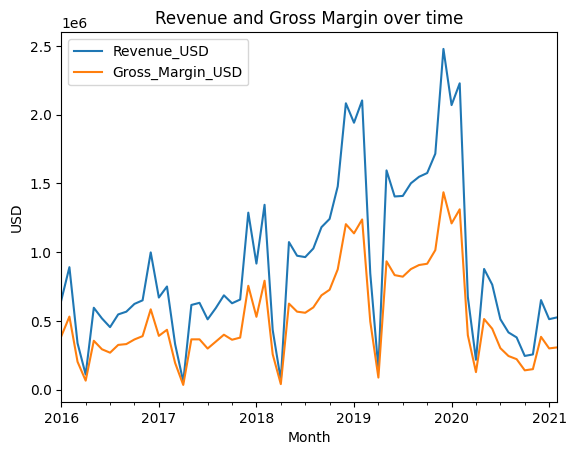

In [21]:
## Groups by Order Month and draws a simple time series for revenue & margin.

monthly = (df.groupby('Order Month', as_index=False)
             .agg(Orders=('Order Number','nunique'),
                  Revenue_USD=('Revenue_USD','sum'),
                  Gross_Margin_USD=('Gross_Margin_USD','sum'))
           ).sort_values('Order Month')

monthly.plot(x='Order Month', y=['Revenue_USD','Gross_Margin_USD'])
plt.title('Revenue and Gross Margin over time'); plt.xlabel('Month'); plt.ylabel('USD')
plt.show()


## 8.2 Top products & subcategories

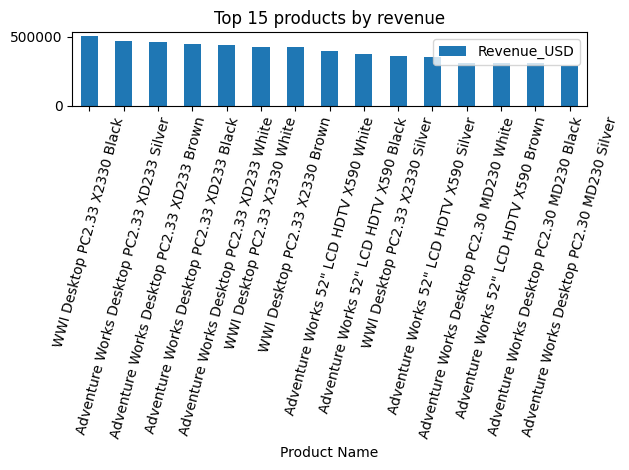

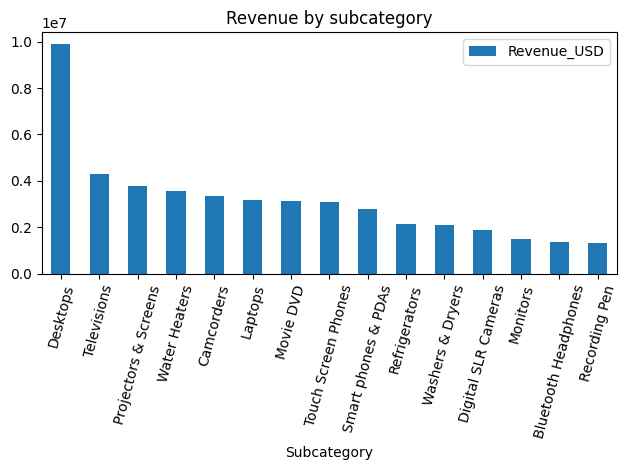

In [22]:
## Ranks the top revenue products & subcategories.

top_products = (df.groupby('Product Name', as_index=False)['Revenue_USD']
                  .sum().sort_values('Revenue_USD', ascending=False).head(15))
top_products.plot(kind='bar', x='Product Name', y='Revenue_USD'); plt.xticks(rotation=75); plt.title('Top 15 products by revenue'); plt.tight_layout(); plt.show()

top_subcat = (df.groupby('Subcategory', as_index=False)['Revenue_USD']
                .sum().sort_values('Revenue_USD', ascending=False).head(15))
top_subcat.plot(kind='bar', x='Subcategory', y='Revenue_USD'); plt.xticks(rotation=75); plt.title('Revenue by subcategory'); plt.tight_layout(); plt.show()


## 8.3 Geography (customer country vs store country)

In [23]:
## Compares customer vs store countries to reveal cross-border sales

geo = (df.groupby(['Country','Store Country'], as_index=False)['Revenue_USD']
         .sum().sort_values('Revenue_USD', ascending=False).head(20))
geo.head(20)



,Country,Store Country,Revenue_USD
15,United States,United States,23764425.86
14,United States,Online,6107205.31
13,United Kingdom,United Kingdom,5749769.78
6,Germany,Germany,4246279.22
2,Canada,Canada,3611561.79
0,Australia,Australia,2099141.07
8,Italy,Italy,2059086.81
10,Netherlands,Netherlands,1591344.48
12,United Kingdom,Online,1334318.34
4,France,France,1229545.95


## 8.4 Customer metrics

In [24]:
## Computes customer-level metrics and average order value.

cust = (df.groupby('CustomerKey', as_index=False)
          .agg(Orders=('Order Number','nunique'),
               Items=('Quantity','sum'),
               Revenue_USD=('Revenue_USD','sum')))
cust['Avg_Order_Value'] = cust['Revenue_USD'] / cust['Orders']
cust[['Orders','Items','Revenue_USD','Avg_Order_Value']].describe()


,Orders,Items,Revenue_USD,Avg_Order_Value
count,11887.000000,11887.000000,11887.000000,11887.000000
mean,2.214688,16.636410,4690.458450,2122.457421
std,1.391487,13.599239,5197.622706,2251.639071
min,1.000000,1.000000,1.990000,1.990000
25%,1.000000,7.000000,1138.915000,713.959000
50%,2.000000,13.000000,2995.000000,1503.280000
75%,3.000000,23.000000,6425.065000,2723.533333
max,14.000000,124.000000,61871.700000,32056.890000


# 9. Export analysis table for Tableau

In [25]:
## Export — produce a single denormalized table for Tableau.
cols_for_tableau = [
    'Order Number','Line Item','Order Date','Delivery Date','Delivery Date (imputed)','Is_Delivery_Imputed','Delivery_Days',
    'CustomerKey','StoreKey','ProductKey',
    'Country','Store Country','State','Store State',
    'Product Name','Brand','Subcategory','Quantity','Currency Code',
    'Unit Cost USD','Unit Price USD','Revenue_USD','Cost_USD','Gross_Margin_USD','Order Month'
]

tableau_df = df[cols_for_tableau].copy()

OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
out_path = OUTPUT_DIR/'analysis_table_with_delivery.csv'
tableau_df.to_csv(out_path, index=False)
out_path


PosixPath('/content/drive/MyDrive/Colab Notebooks/Global Electronics Retailer/Tableau_Export/analysis_table_with_delivery.csv')

# 10. Reproducibility snapshot

In [26]:
## Reproducibility — capture versions to make runs repeatable.

import sys, platform
print("Python:", sys.version.split()[0])
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)
print("Platform:", platform.platform())
print("Rows exported:", len(tableau_df))


Python: 3.12.12
Pandas: 2.2.2
Numpy: 2.0.2
Platform: Linux-6.6.105+-x86_64-with-glibc2.35
Rows exported: 62884
